# ANOVA
ANOVA, or Analysis of Variance, is a statistical method used to compare means among three or more groups. It assesses whether there are any statistically significant differences in the means of a dependent variable across different groups. ANOVA is commonly used in experimental and research settings where multiple groups are compared.

The following are the key points about ANOVA,
1. Null hypothesis (H0): The null hypothesis for ANOVA is that there are no significant differences among the group means.
2. Alternative hypothesis (H1): The alternative hypothesis typically asserts that atleast one group mean is different from the others.
3. Assumption of normality: ANOVA assumes that the populations from which the samples are drawn are normally distributed. This assumption is more critical for smaller sample sizes.
4. Homogeneity of variances: ANOVA assumes that the variances within each group are approximately equal. This assumption is known as homogeneity of variance.
5. Independent samples: The samples used in ANOVA should be independent of each other.
6. Categorical independent variable: ANOVA is used when there is one categorical independent variable (with three or more levels or groups) and one continuous dependent variable.

There are different types of ANOVA,
- One-Way ANOVA: Compares means across three or more independent (unrelated) groups.
- Two-Way ANOVA: Involves two independent variables. It can assess the main effects of each variable and their interaction effect.
- Repeated Measures ANOVA: Involves repeated measurements on the same subjects or groups over time.

The test statistic in ANOVA is the F-statistic and the decision to reject the null hypothesis is based on comparing the calculated F-statistic to a critical value or by looking at the associated P-Value.

# Implementation of ANOVA

In [1]:
from scipy.stats import f_oneway

# Example data for three groups
group1 = [23, 21, 18, 25, 27]
group2 = [30, 28, 35, 32, 26]
group3 = [20, 18, 22, 24, 26]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

# Print results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 8.912790697674415
P-Value: 0.0042418369129101855


Remember, when interpreting the results, a significant P-Value suggests that there are significant differences among atleast 2 groups. If the P-Value is not significant, the null hypothesis is not rejected, indicating that there is no significant difference among the group means.

# What Is F-Ratio?
$\text{F-Ratio} = \frac{\text{Variance between groups}}{\text{Variance within groups}}$.

Based on the distribution, there is a way to calculate the P-Value.
- If F - Ratio is high, then the p - value is low, go for H1.
- If F - Ratio is low, then the p - value is high, go for H0.

ANOVA will output the F-Stat and the P-Value.

# Example

Fail to reject H0
All groups have the same mean
Accept H0


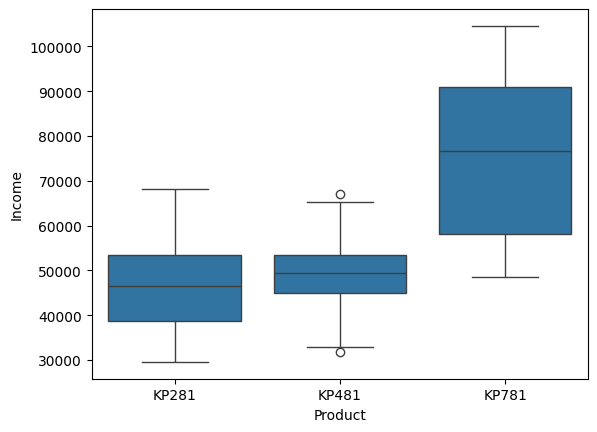

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import f_oneway

# import the dataset
df = pd.read_csv("aerofit.csv")
df

# create three random groups
df["random_group"] = np.random.choice(["g1", "g2", "g3"], size = len(df))
df

# store the created groupd in different variables
income_g1 = df[df["random_group"] == "g1"]["Income"]
income_g2 = df[df["random_group"] == "g2"]["Income"]
income_g3 = df[df["random_group"] == "g3"]["Income"]

# extract the means of the groups
income_g1.mean()
income_g2.mean()
income_g3.mean()

# H0: All groups have same mean
# Ha: One or more groups have different mean

# conduct the ANOVA test
f_stat, p_value = f_oneway(income_g1, income_g2, income_g3)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have the same mean")

# repeat the same for income vs product
# H0: All groups have the same mean

sns.boxplot(x = "Product", y = "Income", data = df)

income_kp281 = df[df["Product"] == "KP281"]["Income"]
income_kp481 = df[df["Product"] == "KP481"]["Income"]
income_kp781 = df[df["Product"] == "KP781"]["Income"]

income_kp281.mean()
income_kp481.mean()
income_kp781.mean()

f_oneway(income_kp281, income_kp481, income_kp781)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Accept H0")

# Assumptions Of ANOVA
The main idea behind ANOVA is the ratio of variance, but unfortunately the computation of P-Value, the corresponding distribution vis. F-Distribution or the F-Stat, all of these depend on the data being gaussian (THE DATA SHOULD BE GAUSSIAN).
1. Data should be gaussian (but this is not always true, sometimes the data may be skewed - left or right).
2. Data is independent of each other. What does this mean? Do not confuse this with independence between the features. The dependency may be there across the features, but there is dependency between the objects for which the feature exist.
3. Equal variances in different groups. In practice, the above assumption can be ignored and ANOVA test can be conducted very well. But, it is important to adhere to the above assumptions while conducting the ANOVA test.

When the assumptions are not followed strictly we go with Kruskal-Wallis Test.

# How To Check If The Data Is Gaussian?

### QQ plot (Quartile-Quartile plot)
The data is compared with actual Gaussian. Meaning, every percentile should be compared.

If the data is gaussian, the 1st percentile of both (the data and the gaussian data) should be same.

The QQ plot looks at the data at a granular level, as opposed to the 68/ 95/ 99 rule.
If the data is equivalent to gaussian, it means that the scatter plot of data vs gaussian will lie in a single straight line (linear).

If the data is totally different, the scatter plot will look to have a hap-hazard pattern (non-linear).

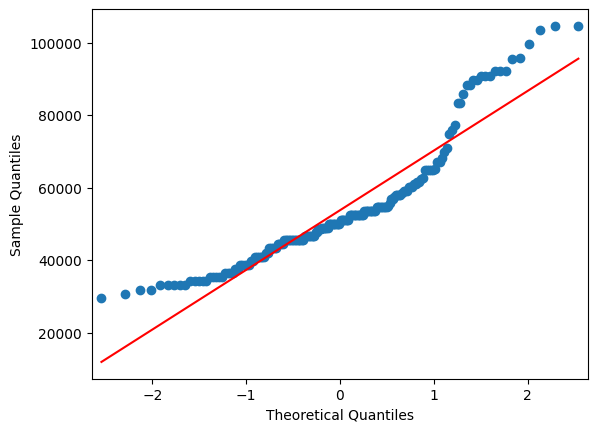

In [4]:
from statsmodels.graphics.gofplots import qqplot

df = pd.read_csv("aerofit.csv")

qqplot(df["Income"], line = "s")
plt.show()

QQ plot is used to only conduct a visual test and it is not a statistical test.

### Shapiro Test
A few samples from the data to conduct this test. This test may not work if the data is too large.

In [5]:
from scipy.stats import shapiro

# create a subset of the data
income_subset = df["Income"].sample(100)
income_subset

# h0: Data is gaussian
# h1: Data is not gaussian

# conduct the shapiro test
test_stat, p_value = shapiro(income_subset)
test_stat, p_value

(np.float64(0.8792906342240903), np.float64(1.6938523402950304e-07))

# How To Check The Independence Of Data?
It is not possible to confirm this.

# How To Check If There Is Equal Variance In Different Groups?
### Levene Test

In [7]:
from scipy.stats import levene

# store the incomes of male and female buyers in separate variables
income_male = df[df["Gender"] == "Male"]["Income"]
income_female = df[df["Gender"] == "Female"]["Income"]

# find the means
income_male.mean(), income_female.mean()

# find the variance
income_male.var(), income_female.var()

# h0: Variance is equal
# h1: Variance is not equal

# conduct the levene test
levene_stat, p_value = levene(income_male, income_female)
levene_stat, p_value

(np.float64(6.2120641863060255), np.float64(0.013602259044517926))

# Kruskal-Wallis Test
The Kruskal-Wallis test is a non-parametric statistical test used to determine whether there are any statistically significant differences among two or more independent groups. It is an alternative to the one-way analysis of variance (ANOVA) for situations where the assumptions of ANOVA (such as normality and homogeneity of variances) are not met.

The following are key points about the Kruskal-Wallis test,
1. Null hypothesis (H0): The null hypothesis for the Kruskal-Wallis test is that there are no differences among the groups.
2. Alternative hypothesis (H1): The alternative hypothesis suggests that at least one group is different from the others.
3. Assumption of independence: The observations within each group should be independent of each other.
4. Categorical independent variable: The Kruskal-Wallis test is used when there is one categorical independent variable (with three or more levels or groups) and one continuous dependent variable.
5. Ranking of data: The data are ranked across all groups. The test is based on the ranks of the data rather than the actual values.
6. Test statistic: The test statistic is denoted as H, and it follows the chi-squared distribution with $(k − 1)$ degrees of freedom, where $k$ is the number of groups.

In [8]:
from scipy.stats import kruskal

# Example data for three groups
group1 = [23, 21, 18, 25, 27]
group2 = [30, 28, 35, 32, 26]
group3 = [20, 18, 22, 24, 26]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(group1, group2, group3)

# Print results
print("H-Statistic:", h_statistic)
print("P-Value:", p_value)

H-Statistic: 8.415053763440865
P-Value: 0.014883130602986147


### Interpreting the Results
If the P-Value is less than your chosen significance level (e.g., 0.05), the null hypothesis is rejected, suggesting that there are significant differences among at least two groups. If the P-Value is not significant, null hypothesis is not rejected, indicating that there is no significant difference among the groups.